En el modelo de la parte de construcción, vamos a usar el conjunto de datos de cáncer, que es un problema de clasificación de clases múltiples muy famoso. Este conjunto de datos se calcula a partir de una imagen digitalizada de un aspirado de aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.

El conjunto de datos consta de 30 características (radio medio, textura media, perímetro medio, área media, suavidad media, compacidad media, concavidad media, puntos cóncavos medios, simetría media, dimensión fractal media, error de radio, error de textura, error de perímetro, error de área, error de suavidad, error de compacidad, error de concavidad, error de puntos cóncavos, error de simetría, error de dimensión fractal, peor radio, peor textura, peor perímetro, peor área, peor suavidad, peor compacidad, peor concavidad, peores puntos cóncavos, peor simetría y peor dimensión fractal) y un objetivo (tipo de cáncer).

Estos datos tienen dos tipos de clases de cáncer: maligno (dañino) y benigno (no dañino). Aquí, puede construir un modelo para clasificar el tipo de cáncer. El conjunto de datos está disponible en la biblioteca scikit-learn o también puede descargarlo desde la Biblioteca de Aprendizaje Automático de la UCI.

# **Cargando Datos **
Primero carguemos el conjunto de datos requerido que usará.

In [19]:
#Importar la biblioteca de conjuntos de datos de scikit-learn
from sklearn import datasets

#Cargar conjunto de datos
cancer = datasets.load_breast_cancer()
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

# **Explorando Datos **
Después de cargar el conjunto de datos, es posible que desee saber un poco más al respecto. Puede verificar los nombres de características y objetivos.

In [20]:
# imprime los nombres de las 13 características
print("Features: ", cancer.feature_names)

# imprime la etiqueta tipo de cáncer ('maligno' 'benigno')
print("Labels: ", cancer.target_names)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


Exploremos un poco más. También se puede verificar la forma del conjunto de datos usando la forma.

In [21]:
# imprimir datos(característica)forma
cancer.data.shape

(569, 30)

Verifiquemos los 5 mejores registros del conjunto de características.

In [22]:
# imprimir las características de los datos del cáncer (los 5 registros principales)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

Echemos un vistazo al conjunto de objetivos.


In [23]:
# imprimir las etiquetas del cáncer (0: maligno, 1: benigno)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

# **Dividiendo Datos **
Para comprender el rendimiento del modelo, dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de pruebas es una buena estrategia. Divida el conjunto de datos utilizando la función train_test_split(). debe pasar 3 características de parámetros, objetivo y tamaño test_set. Además, puede usar random_state para seleccionar registros al azar.

In [24]:
# Importar la función train_test_split
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test


# **Generando el Modelo**
Construyamos modelo de máquina vectorial de soporte. Primero, importe el módulo SVM y cree un objeto clasificador de vectores de soporte pasando el núcleo de argumento como el núcleo lineal en la función SVC().

Luego, ajuste su modelo en el conjunto de trenes usando fit() y realice la predicción en el conjunto de pruebas usando predict().

In [25]:
#Importar el modelo svm
from sklearn import svm

#Crear un clasificador svm
clf = svm.SVC(kernel='linear') # Linear Kernel

#Entrena el modelo usando los conjuntos de entrenamiento
clf.fit(X_train, y_train)

#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf.predict(X_test)

# **Evaluando el Modelo**
Estimemos con qué precisión el clasificador o modelo puede predecir el cáncer de mama de las pacientes.

La precisión se puede calcular comparando los valores reales del conjunto de pruebas y los valores predichos.

In [26]:
#Importar el módulo de métricas de scikit-learn para el cálculo de la precisión
from sklearn import metrics

# Corrección o exactitud del modelo: ¿con qué frecuencia es correcto el clasificador?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


Bueno, se tiene una tasa de clasificación del 96.49%, considerada como muy buena precisión.

Para una evaluación adicional, también se puede verificar la precisión y la recuperación del modelo.

In [27]:
# Precisión del modelo: ¿qué porcentaje de tuplas positivas están etiquetadas como tales?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Recuperación del modelo: ¿qué porcentaje de tuplas positivas están etiquetadas como tales?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629



Se tiene una precisión del 98% y una recuperación del 96%, que se consideran valores muy buenos.

# **Usando un kernel polinomial**

In [28]:
#Crear un clasificador svm
clf1 = svm.SVC(kernel='poly') # Kernel Polinomial

#Entrena el modelo usando los conjuntos de entrenamiento
clf1.fit(X_train, y_train)

#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf1.predict(X_test)

In [29]:
#Importar el módulo de métricas de scikit-learn para el cálculo de la precisión
from sklearn import metrics

# Corrección o exactitud del modelo: ¿con qué frecuencia es correcto el clasificador?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9181286549707602


In [30]:
# Precisión del modelo: ¿qué porcentaje de tuplas positivas están etiquetadas como tales?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Recuperación del modelo: ¿qué porcentaje de tuplas positivas están etiquetadas como tales?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8852459016393442
Recall: 1.0


# **Usando otro kernel**

---



In [31]:
#Crear un clasificador svm
clf2 = svm.SVC(kernel='rbf') # Kernel RBF

#Entrena el modelo usando los conjuntos de entrenamiento
clf2.fit(X_train, y_train)

#Predecir la respuesta para el conjunto de datos de prueba
y_pred = clf2.predict(X_test)

In [32]:
#Importar el módulo de métricas de scikit-learn para el cálculo de la precisión
from sklearn import metrics

# Corrección o exactitud del modelo: ¿con qué frecuencia es correcto el clasificador?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9239766081871345


In [33]:
# Precisión del modelo: ¿qué porcentaje de tuplas positivas están etiquetadas como tales?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Recuperación del modelo: ¿qué porcentaje de tuplas positivas están etiquetadas como tales?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8925619834710744
Recall: 1.0


Para graficar las métricas de cada modelo (precisión, exactitud y recuperación) usando los datos cargados, podemos usar la librería matplotlib.pyplot.

Primero, necesitamos obtener las métricas de cada modelo, las cuales ya calculaste en tu código. Las almacenaremos en listas para facilitar la gráfica:

In [34]:
# Métricas del modelo lineal
accuracy_linear = metrics.accuracy_score(y_test, clf.predict(X_test))
precision_linear = metrics.precision_score(y_test, clf.predict(X_test))
recall_linear = metrics.recall_score(y_test, clf.predict(X_test))

# Métricas del modelo polinomial
accuracy_poly = metrics.accuracy_score(y_test, clf1.predict(X_test))
precision_poly = metrics.precision_score(y_test, clf1.predict(X_test))
recall_poly = metrics.recall_score(y_test, clf1.predict(X_test))

# Métricas del modelo RBF
accuracy_rbf = metrics.accuracy_score(y_test, clf2.predict(X_test))
precision_rbf = metrics.precision_score(y_test, clf2.predict(X_test))
recall_rbf = metrics.recall_score(y_test, clf2.predict(X_test))

# Almacenar las métricas en listas
accuracy = [accuracy_linear, accuracy_poly, accuracy_rbf]
precision = [precision_linear, precision_poly, precision_rbf]
recall = [recall_linear, recall_poly, recall_rbf]

Ahora, podemos usar matplotlib.pyplot para graficar las métricas:

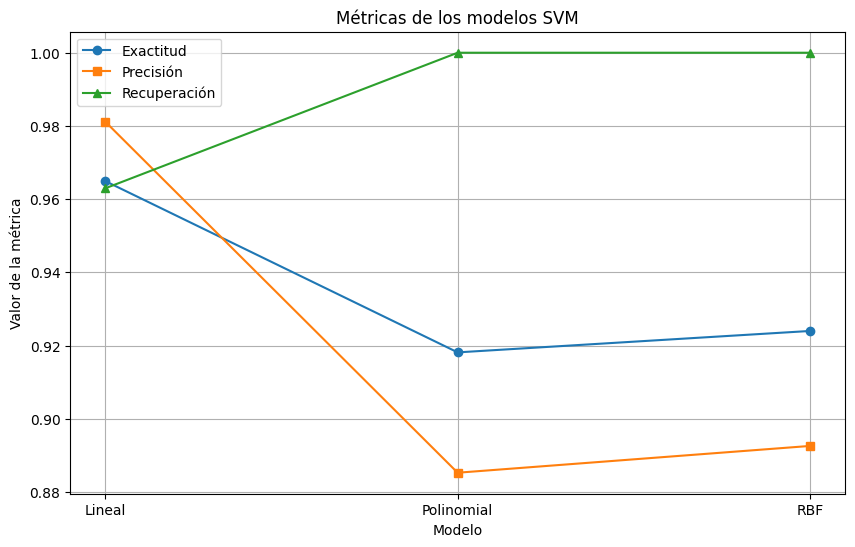

In [35]:
import matplotlib.pyplot as plt

# Definir los nombres de los modelos
models = ['Lineal', 'Polinomial', 'RBF']

# Crear la gráfica
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la gráfica si es necesario

plt.plot(models, accuracy, label='Exactitud', marker='o')
plt.plot(models, precision, label='Precisión', marker='s')
plt.plot(models, recall, label='Recuperación', marker='^')

plt.title('Métricas de los modelos SVM')
plt.xlabel('Modelo')
plt.ylabel('Valor de la métrica')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()